# Numerical Derivatives
## AEP 4380

<p>The purpose of this assignment was just to familiarize oneself with the programming environment being used. The actual numerical portion is relatively straightforward. One must find the first and second derivative of the following equation using the forward, backward, and central difference methods: <br>

$$f(x) = sin(x)e^{−0.04x^2}$$

The derivative and second derivative should be calculated with step sizes of $h=0.5$ and $h=0.05$ in order to compare all of the methods at different resolutions. <br>
</p>

In [3]:
# The usual imports
import matplotlib.pyplot as plt
import numpy as np, scipy as sp

In [38]:
# Define the function to be differentiated
def f(x):
    return np.sin(x)*np.exp(-0.04*x*x)

# The derivative that I expect to calculate
def f_p(x):
    return np.cos(x)*np.exp(-0.04*x*x)-np.sin(x)*2*0.04*x*np.exp(-0.04*x*x)

The function to be differentiated (func), a range on which to evaluate the derivative (xmin and xmax), the evaluation location step number (steps), and evaluation interval size (h), must all be provided to the first derivative function.

In [32]:
def derivative(func, xmin, xmax, h, steps, style = "forward"):

    #check for style choice
    style_options = ["forward", "backward", "central"]
    if style not in style_options:
        raise Exception("Please enter an accepted derivative option: %s" %style_options)
    
    xvals = np.zeros(steps) #container for the x value evaluation locations
    function = np.zeros(steps) #container for the actual function value
    deriv = np.zeros(steps) #container for the derivative
    delta = (xmax-xmin)/(steps-1) #distance between evaluation locations
    for i in range(0, steps-1):
        xvals[i] = i*delta+xmin #the value being fed to the function call
        function[i] = func(xvals[i]) #the actual function evaluation at x
        if style == style_options[2]: #central diff requires larger delta
            func_left = func(xvals[i]-h)
            func_right = func(xvals[i]+h)
            deriv[i] = (func_right-func_left)/(2*h)
        else: #forward and backward share denominator
            if style == style_options[0]: #forward diff
                func_left = function[i] #save a function call
                func_right = func(xvals[i]+h) 
            elif style == style_options[1]: #backward diff
                func_left = func(xvals[i]-h)
                func_right = function[i] #save a function call
            deriv[i] = (func_right-func_left)/h
    return xvals, function, deriv

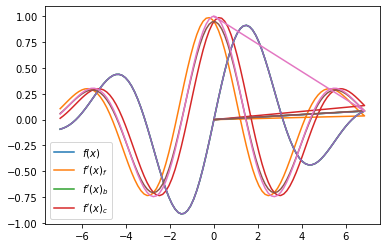

In [48]:
xmin = -7
xmax = 7
h = 0.5
steps = 100
xvals, orig, deriv = derivative(f,xmin,xmax,h,steps,"forward")
plt.plot(xvals,orig)
plt.plot(xvals,deriv)
xvals, orig, deriv = derivative(f,xmin,xmax,h,steps,"backward")
plt.plot(xvals,orig)
plt.plot(xvals,deriv)
xvals, orig, deriv = derivative(f,xmin,xmax,h,steps,"central")
plt.plot(xvals,orig)
plt.plot(xvals,deriv)

plt.plot(xvals,f_p(xvals))
plt.legend(["$f(x)$","$f'(x)_f$","$f'(x)_b$","$f'(x)_c$"])

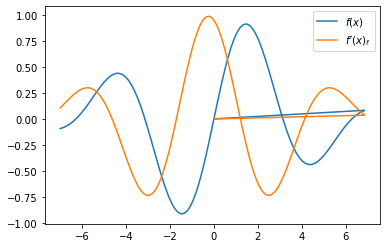

In [34]:
plt.plot(xvals,orig)
plt.plot(xvals,deriv)


In [ ]:
def deriv_forward(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x)
        func_prev = sinc(1, DECAY_VAL, x-h)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/h
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
def deriv_backward(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x+h)
        func_prev = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/h
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
def deriv_central(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x+h)
        func_prev = sinc(1, DECAY_VAL, x-h)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/(2*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
data_f = deriv_forward(0.5,200,-7,+7)
data_b = deriv_backward(0.5,200,-7,+7)
data_c = deriv_central(0.5,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward, Backward, and Central difference methods with h=0.5")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f'(x)_f$","$f'(x)_b$","$f'(x)_c$"])

In [ ]:
data_f = deriv_forward(0.05,200,-7,+7)
data_b = deriv_backward(0.05,200,-7,+7)
data_c = deriv_central(0.05,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward, Backward, and Central difference methods with h=0.05")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f'(x)_f$","$f'(x)_b$","$f'(x)_c$"])

In [ ]:
data_fp05 = deriv_forward(0.05,200,-7,+7)
data_fp5 = deriv_forward(0.5,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward difference method with h=0.05 and h=0.5")
plt.plot(xval,data_fp05[0])
plt.plot(xval,data_fp05[1])
plt.plot(xval,data_fp5[1])
plt.legend(["$f(x)$","$f'(x)_f$; $h=0.05$","$f'(x)_f$; $h=0.5$"])

Second Derivative

In [ ]:
def second_deriv_f(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_ahead = sinc(1, DECAY_VAL, x+2*h)
        func_plus = sinc(1, DECAY_VAL, x+h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_ahead-2*func_plus+func_now)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
def second_deriv_b(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_behind = sinc(1, DECAY_VAL, x-2*h)
        func_minus = sinc(1, DECAY_VAL, x-h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_now-2*func_minus+func_behind)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
def second_deriv_c(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_plus = sinc(1, DECAY_VAL, x+h)
        func_minus = sinc(1, DECAY_VAL, x-h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_plus-2*func_now+func_minus)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [ ]:
data_f = second_deriv_f(0.05,200,-7,+7)
data_b = second_deriv_b(0.05,200,-7,+7)
data_c = second_deriv_c(0.05,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("2nd Deriv: Forward, Backward, and Central difference methods with h=0.05")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f''(x)_f$","$f''(x)_b$","$f''(x)_c$"])